In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed: pip install opencv-python
import random

# Paths
category = "Residential"  # Change category as needed
split = "train"  # Change split as needed (e.g., "train", "val", "test")
trained_orig_image_dir = f"../data/training_data/{split}" # Use f-string for substitution
output_masks_dir = f"../data/segmentation_masks/{category}"  # Path to individual masks
#cleaned_masks_path = f"../data/training_data/{category}_{split}_masks_cleaned.npy"  # Correct combined masks path
combined_masks_path = f"../data/training_data/{split}/{category}_{split}_masks_combined.npy"


# Load images and combined masks
image_path = os.path.join(trained_orig_image_dir, f"{category}_{split}.npy")
if not os.path.exists(image_path):
    print(f"Image file not found at {image_path}")
    exit()
images = np.load(image_path)

print(f"Loaded images: {images.shape}")  # Debug images shape

if os.path.exists(combined_masks_path):
    cleaned_masks = np.load(cleaned_masks_path)
    print(f"Loaded combined masks: {cleaned_masks.shape}")  # Debug combined masks shape
else:
    print(f"Combined masks file not found at {cleaned_masks_path}")
    exit()

# Verify individual masks
mask_files = sorted([os.path.join(output_masks_dir, "train", f) for f in os.listdir(os.path.join(output_masks_dir, "train")) if f.endswith('.npy')])
print(f"Number of individual masks found: {len(mask_files)}")

# Randomly sample 5 indices
sample_indices = random.sample(range(len(images)), 5)

for i in sample_indices:
    # Load the original image
    original_image = images[i]

    # Debug original image
    print(f"Image {i}: Shape={original_image.shape}, Min={original_image.min()}, Max={original_image.max()}")
    if original_image.max() <= 1.0:  # Normalize to 0-255 if needed
        original_image = (original_image * 255).astype(np.uint8)
    
    # Load the corresponding individual mask
    individual_mask_path = mask_files[i]
    individual_mask = np.load(individual_mask_path)

    print(f"Individual Mask {i}: Shape={individual_mask.shape}, Min={individual_mask.min()}, Max={individual_mask.max()}")

    # Extract class from individual mask
    individual_mask_class = np.argmax(individual_mask, axis=-1)

    # Resize the individual mask to match the image
    individual_mask_resized = cv2.resize(
        individual_mask_class.astype(np.uint8),
        (original_image.shape[1], original_image.shape[0]),
        interpolation=cv2.INTER_NEAREST,
    )

    if individual_mask_resized.max() > 0:  # Ensure valid mask before normalizing
        individual_mask_normalized = individual_mask_resized / individual_mask_resized.max()
    else:
        print(f"Individual Mask {i} is empty. Skipping overlay generation.")
        individual_mask_normalized = np.zeros_like(individual_mask_resized, dtype=np.float32)

    # Overlay individual mask on the original image
    overlay_image_individual = original_image.copy()
    overlay_image_individual[..., 0] = (
        overlay_image_individual[..., 0] * 0.5 + individual_mask_normalized * 255 * 0.5
    ).astype(np.uint8)

    # Visualization
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay_image_individual)
    plt.title("Overlay Image with Individual Mask")
    plt.axis("off")

    plt.show()


Loaded images: (1920, 513, 513, 3)


NameError: name 'cleaned_masks_path' is not defined

Loaded images: (1920, 513, 513, 3)
Loaded combined masks: (1920, 513, 513)
Image 559: Shape=(513, 513, 3), Min=0.23529411852359772, Max=0.5568627715110779
Combined Mask 559: Shape=(513, 513), Min=0, Max=1


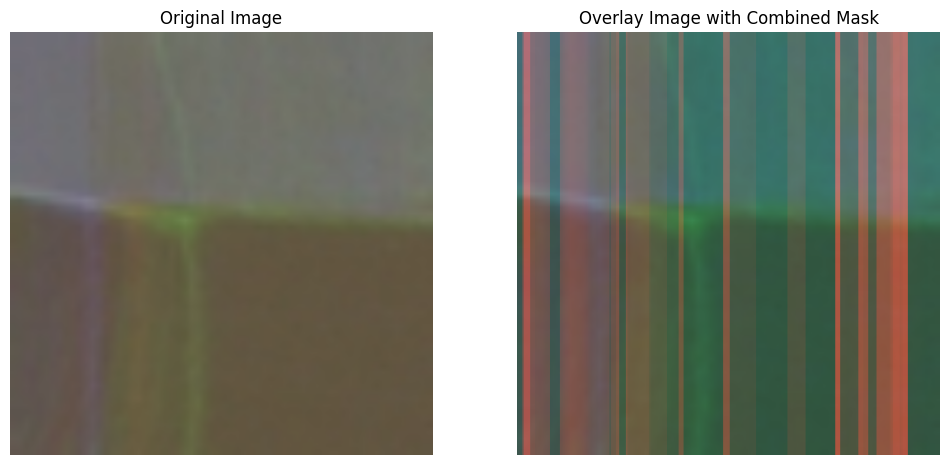

Image 927: Shape=(513, 513, 3), Min=0.2078431397676468, Max=0.6000000238418579
Combined Mask 927: Shape=(513, 513), Min=0, Max=1


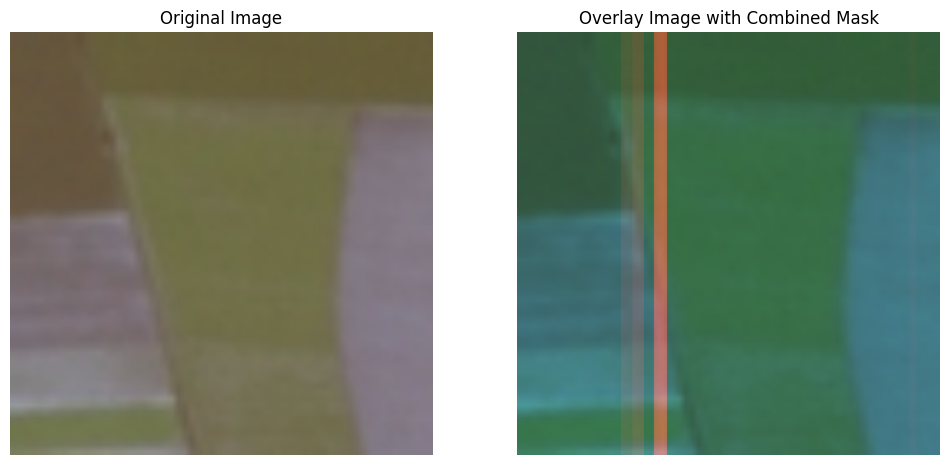

Image 1070: Shape=(513, 513, 3), Min=0.18431372940540314, Max=0.9176470637321472
Combined Mask 1070: Shape=(513, 513), Min=0, Max=0


/tmp/ipykernel_3568/823494395.py:51: RuntimeWarning: invalid value encountered in divide
  overlay_image[..., 0] * 0.5 + (combined_mask_class / combined_mask_class.max() * 255) * 0.5
/tmp/ipykernel_3568/823494395.py:52: RuntimeWarning: invalid value encountered in cast
  ).astype(np.uint8)


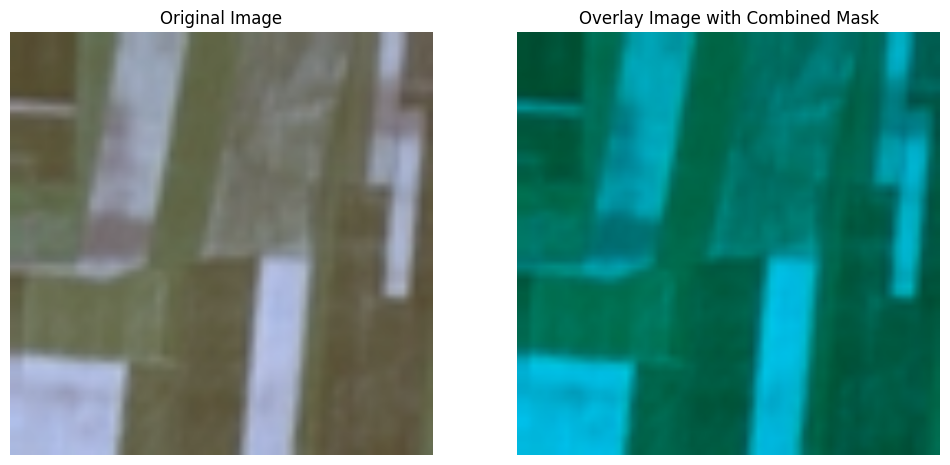

Image 1650: Shape=(513, 513, 3), Min=0.15294118225574493, Max=0.6000000238418579
Combined Mask 1650: Shape=(513, 513), Min=0, Max=0


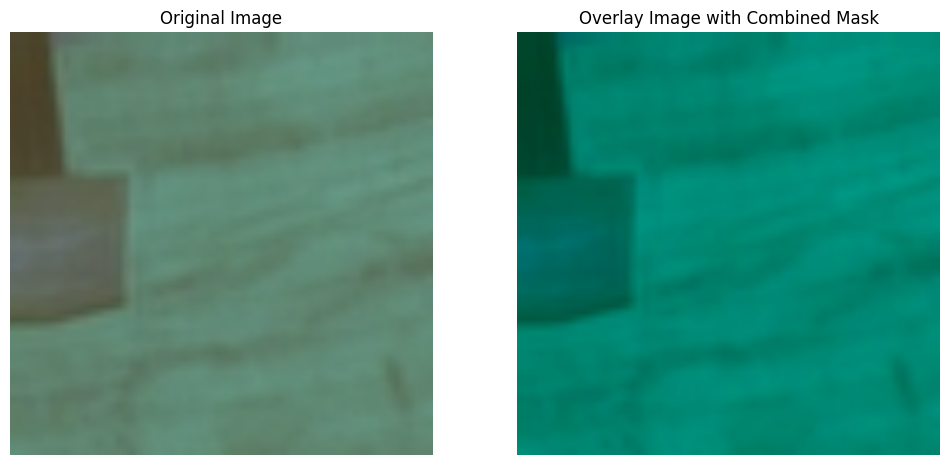

Image 385: Shape=(513, 513, 3), Min=0.1411764770746231, Max=0.6352941393852234
Combined Mask 385: Shape=(513, 513), Min=0, Max=1


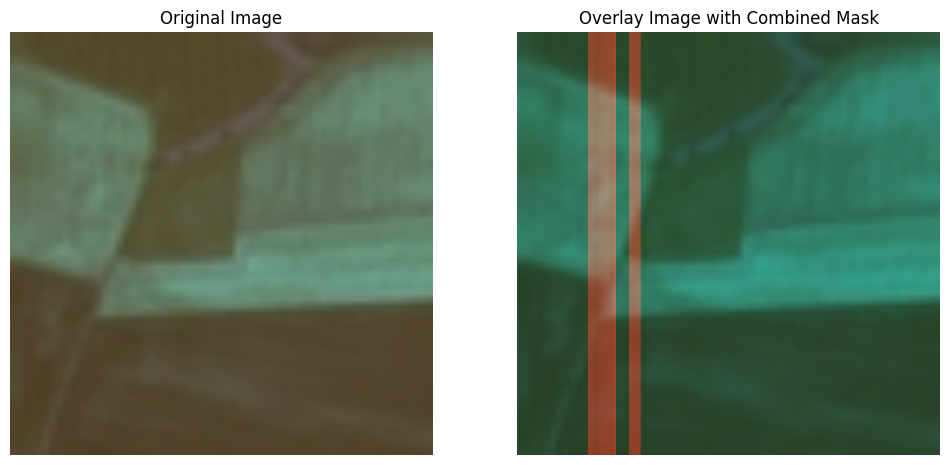

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is installed: pip install opencv-python
import random

# Paths
category = "AnnualCrop"  # Change category as needed
split = "train"  # Change split as needed (e.g., "train", "val", "test")
trained_orig_image_dir = f"../data/training_data/{split}"  # Path to input images
combined_masks_path = f"../data/training_data/{split}/{category}_{split}_masks_combined.npy"  # Path to combined masks

# Load images
image_path = os.path.join(trained_orig_image_dir, f"{category}_{split}.npy")
if not os.path.exists(image_path):
    print(f"Image file not found at {image_path}")
    exit()
images = np.load(image_path)
print(f"Loaded images: {images.shape}")

# Load combined masks
if os.path.exists(combined_masks_path):
    combined_masks = np.load(combined_masks_path)
    print(f"Loaded combined masks: {combined_masks.shape}")
else:
    print(f"Combined masks file not found at {combined_masks_path}")
    exit()

# Randomly sample 5 indices
sample_indices = random.sample(range(len(images)), 5)

for i in sample_indices:
    # Load the original image
    original_image = images[i]

    # Debug original image
    print(f"Image {i}: Shape={original_image.shape}, Min={original_image.min()}, Max={original_image.max()}")
    if original_image.max() <= 1.0:  # Normalize to 0-255 if needed
        original_image = (original_image * 255).astype(np.uint8)

    # Load the corresponding combined mask
    combined_mask = combined_masks[i]
    print(f"Combined Mask {i}: Shape={combined_mask.shape}, Min={combined_mask.min()}, Max={combined_mask.max()}")

    # Extract class from combined mask
    combined_mask_class = np.argmax(combined_mask, axis=-1)  # Convert from one-hot encoding to class index

    # Overlay combined mask on the original image
    overlay_image = original_image.copy()
    overlay_image[..., 0] = (
        overlay_image[..., 0] * 0.5 + (combined_mask_class / combined_mask_class.max() * 255) * 0.5
    ).astype(np.uint8)

    # Visualization
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay_image)
    plt.title("Overlay Image with Combined Mask")
    plt.axis("off")

    plt.show()
